# Numerische Integration

## Riemann-Summe

Für eine Funktion $f \colon [a,\, b] \to \mathbb{R}$ ist die $N$-te
Riemann-Summe $I_N(f)$ definiert als

$$ I_N(f) = \frac{b - a}{N} \sum_{k=0}^{N-1} f(x_k^N) $$

mit den Stützstellen

$$ x^N_k = a + \left( k + \frac{1}{2} \right)\frac{b - a}{N}, \qquad k = 0, 1, \ldots, N-1. $$

Unter geeigneten Voraussetzungen (z.B. falls $f$ stetig ist), gilt

$$ \lim_{N \to \infty} I_N(f) = \int_a^b f(x) \,dx. $$

In [1]:
from numpy import linspace,log

def riemann_sum(f, a, b, N=50):
    h = (b - a) / N
    x = linspace(a + h/2, b - h/2, N)
    y = f(x)
    return h * y.sum()

riemann_sum(lambda x: log(x**2), 1, 5)

8.0948055938904524

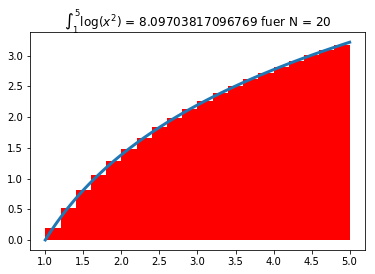

In [1]:
import matplotlib.pyplot as plt
from numpy import log
%matplotlib inline

def plot_riemann_sum(f, a, b, N=50, fstr='f'):
    h = (b - a) / N
    x = linspace(a + h/2, b - h/2, N)
    y = f(x)
    for k in range(N):
        plt.fill_between((x[k] - h/2, x[k] + h/2), (y[k], y[k]), facecolor='r')
    xplot = linspace(a, b, 100)
    plt.title('$\int_{{{a}}}^{{{b}}} {fstr}$ = {result} fuer N = {N}'.format(a=a, b=b, fstr=fstr, N=N, result=h*y.sum()))
    plt.plot(xplot, f(xplot), linewidth=3)

plot_riemann_sum(lambda x: log(x**2), 1, 5, N=20, fstr='\log(x^2)')
plt.show()

## Integration mit Scipy

**Scpipy** ist eine auf Numpy aufbauende Bibliothek, die eine große Sammlung
  von Funktionen für wissenschaftliche Anwendungen enthält.

```python
scipy.integrate.quad(f, a, b, args=())
```

`quad` berechnet numerisch das Integral über `f` von `a` bis `b` (Quadratur).
`a` und `b` kann auch `-numpy.inf` bzw. `numpy.inf` sein für Integration über
unbeschränkte Intervalle. (Dabei werden natürlich *nicht* unendliche viele Terme berechnet, sondern Kriterien verwendet um abzuschätzen, ab wann das Integral von der entsprechenden Approximation nicht mehr wesentlich abweicht).

`args` sind zusätzliche Arguemnte, die an `f` übergeben werden.

Der Rückgabewert ist ein Tupel `(result, error_bound)`.

In [1]:
from scipy.integrate import quad

quad(lambda x: log(x**2), 1,5)

(8.094379124341003, 1.825628324473574e-10)

`quad` hat eine Vielzahl von Optionen, die z.B. die Wahl des
Quadratur-Verfahrens beeinflussen. Für weitere Details:

In [1]:
quad?

Analog gibt es Funktionen `dblquad`, `tplquad` und `nquad` für 2-, 3- und
n-fach-Integrale.

Andere Integrations-Methoden sind z.B. Gauss-Quadratur (`fixed_quad` bzw.
`quadrature`) oder `romberg`.